# **Analyzing Transcripts in Resident Evil: The Actual Work**
## **Step 4: Analyzing the Data**
Once our data has been extracted, cleaned, and saved, we can finally start enriching and analyzing the transcripts. We'll do this using the [`os`](https://docs.python.org/3/library/os.html) module, the [`pandas`](https://pandas.pydata.org/) library, and the [`matplotlib`](https://matplotlib.org/) library.

If you read the `RE_Data_Setup.ipynb` notebook (or looked at the contents of the folder), you'll know that we saved our data into .csv files. For simplicity, we're going to combine all of the data stored in these .csv files into one large dataset, adding new columns called **Game** and **Year** to help us identify data sources. To do this task, we need to map each file to its corresponding game.

### Why didn't you combine all the scripts together from the start?
Even though we're focused on analyzing *Resident Evil* data, we don't always need to compare all thirteen games against each other. Sometimes, we might want to focus on a specific subset of games (i.e. comparing *Resident Evil 2* (1998) to its remake (2019)). Splitting the dataset into multiple files makes it easier for us to manage the individual datasets.

In [379]:
import os
import pandas

# Copied and pasted from RE_Data_Setup.ipynb (Step 1)
def get_path_to_file(file: str) -> str:
    """Returns the path to a file in the working directory.
    Note that there is not error-checking, so the function will return a path
    even if the file doesn't exist within the working directory."""
    return os.path.realpath(file)

# Map each file to the appropriate game
file_list = {'RE0_Transcript.csv': 'Resident Evil 0',
             'RE1_Transcript.csv': 'Resident Evil 1',
             'RE2_Transcript.csv': 'Resident Evil 2',
             'RE2_Remake_Transcript.csv': 'Resident Evil 2 Remake',
             'RE3_Transcript.csv': 'Resident Evil 3',
             'RE3_Remake_Transcript.csv': 'Resident Evil 3 Remake',
             'REV_Transcript.csv': 'Resident Evil Code Veronica',
             'RE4_Transcript.csv': 'Resident Evil 4',
             'RE4_Remake_Transcript.csv': 'Resident Evil 4 Remake',
             'RE5_Transcript.csv': 'Resident Evil 5',
             'RE6_Transcript.csv': 'Resident Evil 6',
             'RE7_Transcript.csv': 'Resident Evil 7',
             'RE8_Transcript.csv': 'Resident Evil Village'
            }

# Map each game to a year
game_years = {'Resident Evil 0': 2002,
              'Resident Evil 1': 1996,
              'Resident Evil 2': 1998,
              'Resident Evil 3': 1999,
              'Resident Evil Code Veronica': 2000,
              'Resident Evil 4': 2005,
              'Resident Evil 5': 2009,
              'Resident Evil 6': 2012,
              'Resident Evil 7': 2017,
              'Resident Evil Village': 2021,
              'Resident Evil 2 Remake': 2019,
              'Resident Evil 3 Remake': 2020,
              'Resident Evil 4 Remake': 2023}

data_set = []
for file, game in file_list.items():
    temp = pandas.read_csv(get_path_to_file(file))
    temp['Game'] = game
    temp['Year'] = game_years[game]
    temp.insert(0, 'Game', temp.pop('Game')) # Shift the columns
    temp.insert(1, 'Year', temp.pop('Year'))
    data_set.append(temp)

re_data = pandas.concat(data_set, ignore_index = True)
re_data

,Game,Year,Character,Gender,Playable,Line
0,Resident Evil 0,2002,Narrator,NaN,Non-Playable,A small mid-western town in America: Raccoon C...
1,Resident Evil 0,2002,Man 1,Male,Non-Playable,Really?
2,Resident Evil 0,2002,Woman,Female,Non-Playable,"Hmm, do you think so too?"
3,Resident Evil 0,2002,Man 2,Male,Non-Playable,Yeah.
4,Resident Evil 0,2002,Man 3,Male,Non-Playable,...do about it?
...,...,...,...,...,...,...
9079,Resident Evil Village,2021,Man,Male,Non-Playable,We have a clear shot.
9080,Resident Evil Village,2021,Man In Black,Male,Non-Playable,Stand down. I can handle it. She's just a kid.
9081,Resident Evil Village,2021,Rose,Female,Non-Playable,"Way to keep it together, Rose."
9082,Resident Evil Village,2021,Man In Black,Male,Non-Playable,"You're a lot like him, you know?"


For the this part of the analysis, we're going to focus on gathering general context. We're going to look at the number of characters and the number of lines of dialogue present in the *Resident Evil* series and visualize the differences between male and female portrayals in the *Resident Evil* series with numbers.

## **Question 1: How many characters are featured per game in the *Resident Evil* series? What is the gender composition of each game?**

We'll start our analysis by looking at the number of characters present within the *Resident Evil* series.

In [380]:
# Count the number of unique characters
re_character_counts = re_data.groupby(['Game', 'Year'])['Character'].nunique()
re_character_counts

Game                         Year
Resident Evil 0              2002    20
Resident Evil 1              1996    10
Resident Evil 2              1998    19
Resident Evil 2 Remake       2019    25
Resident Evil 3              1999    26
Resident Evil 3 Remake       2020    18
Resident Evil 4              2005    17
Resident Evil 4 Remake       2023    17
Resident Evil 5              2009    17
Resident Evil 6              2012    37
Resident Evil 7              2017    19
Resident Evil Code Veronica  2000     9
Resident Evil Village        2021    42
Name: Character, dtype: int64

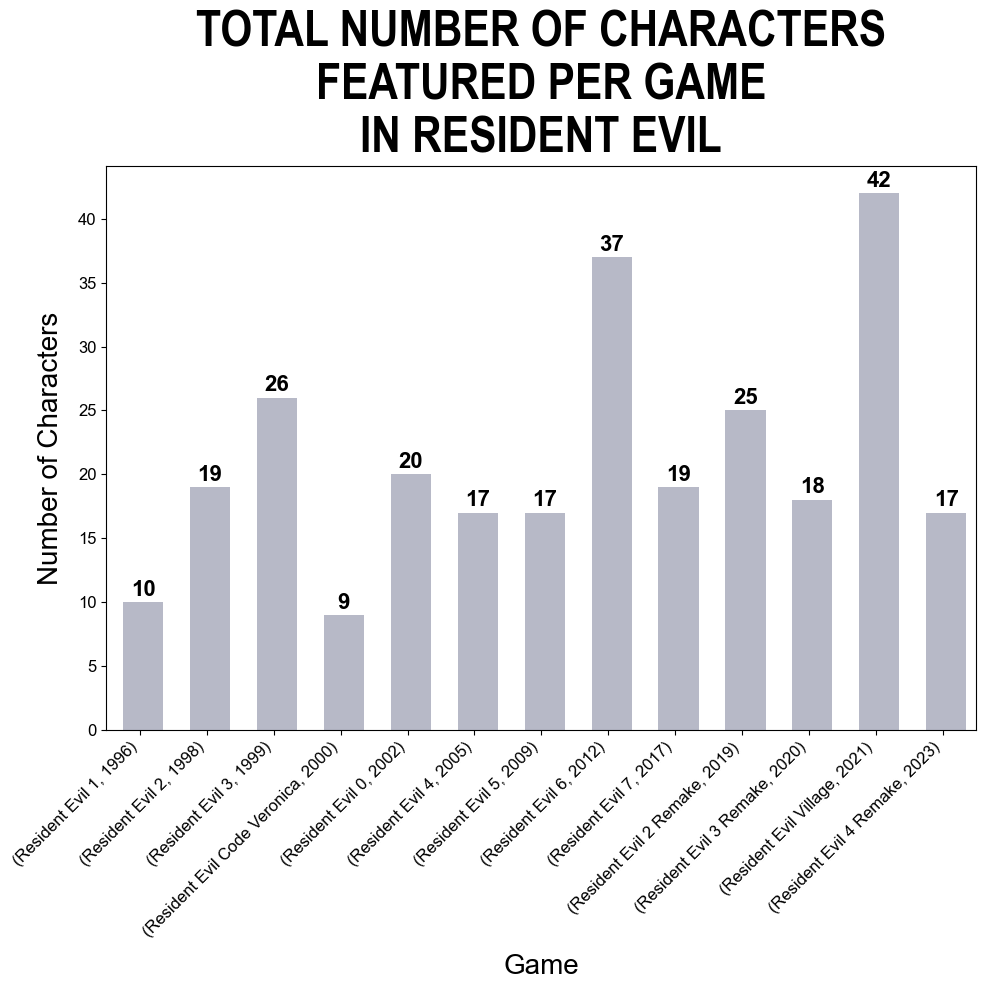

In [383]:
import matplotlib.pyplot as plt

# Add some formatting
title_style = {'fontname': 'Arial', 'fontsize': 36, 'fontstretch': 'condensed', 
               'fontweight': 'bold', 'pad': 10}
label_style = {'fontname': 'Arial', 'fontsize': 20, 'labelpad': 10}
tick_style = {'fontname': 'Arial', 'fontsize': 12}
anno_style = {'fontname': 'Arial', 'fontsize': 16, 'fontweight': 'bold'}
key_style = {'family': 'Arial', 'size': 16}

# Define the colors
female_color = '#CC0000'
male_color = '#181921'
undefined_color = '#B7B9C7'

# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data
re_dialogue_counts = re_character_counts.sort_index(level='Year')
ax = re_dialogue_counts.plot(kind = 'bar', color = [undefined_color])

# Annotate the data
for index, patch in enumerate(ax.patches):
    patch.set_width(0.60)
    ax.annotate(f'{patch.get_height()}', (patch.get_x() + patch.get_width() / 2,
                                          patch.get_height() + 0.5),
                                          ha = 'center', **anno_style)

ax.set_title('Total Number of Characters\n'
             'Featured Per Game\n' \
             'in Resident Evil'.upper(), 
             **title_style)
ax.set_xlabel('Game', **label_style)
ax.set_ylabel('Number of Characters', **label_style)
plt.xticks(**tick_style, ha = 'right', rotation = 45)
plt.yticks(**tick_style)

plt.tight_layout()
plt.show()


We can then try to visualize the **gender composition** of those games by counting the number of characters assigned to each gender (with the values being male, female, and N/A).

(If you skimmed the opening section of the `RE_Data_Setup.ipynb` notebook, you hopefully understand why we're applying a narrow gender classification schema to the characters. But in case you haven't read that part of the notebook: we classified characters as male or female not because we don't consider gender fluidness a valid gender identity but because -- to our knowledge -- the developers of the *Resident Evil* games have only identified their characters as male or female. The arguably genderless or genderfluid entities within the *Resident Evil* series, such as Queen Leech, are typically referred to with "it / its" pronouns due to the fact that these entities are often monsters.)

In [332]:
# Count the number of unique characters (again)
re_unique_characters = re_data.drop_duplicates(subset = ['Game', 'Year', 'Character'])
# Count the number of times a gender appears in the dataset
re_character_gender_counts = re_unique_characters.groupby(['Game', 'Year'])['Gender'] \
                                                 .value_counts(dropna = False)
re_character_gender_counts

Game                         Year  Gender
Resident Evil 0              2002  Male      12
                                   NaN        6
                                   Female     2
Resident Evil 1              1996  Male       7
                                   Female     2
                                   NaN        1
Resident Evil 2              1998  NaN        9
                                   Male       6
                                   Female     4
Resident Evil 2 Remake       2019  NaN       12
                                   Male       8
                                   Female     5
Resident Evil 3              1999  NaN       16
                                   Male       9
                                   Female     1
Resident Evil 3 Remake       2020  Male      11
                                   NaN        6
                                   Female     1
Resident Evil 4              2005  Male       8
                                   NaN        

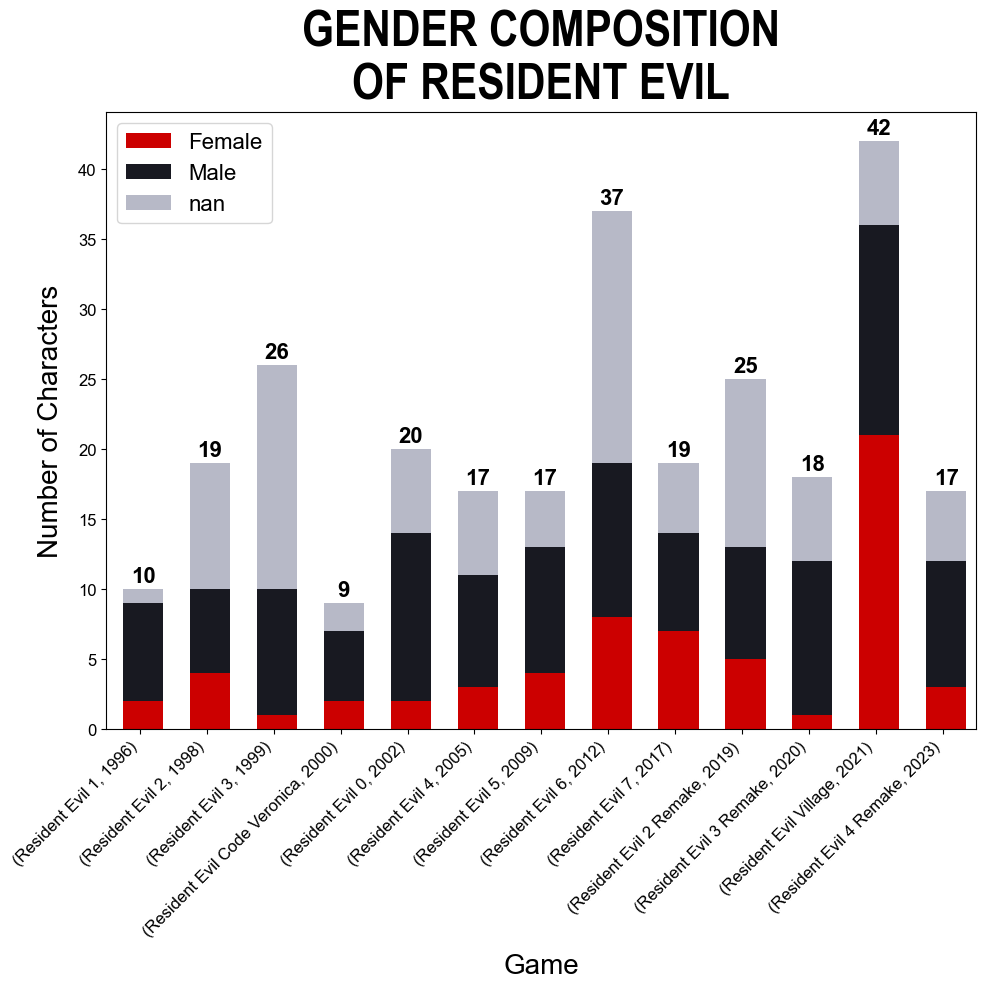

In [384]:
# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data
gender_counts_pivot = re_character_gender_counts.unstack(fill_value = 0)
gender_counts_pivot = gender_counts_pivot.sort_index(level = 'Year')
gender_counts_pivot.plot(kind = 'bar', stacked = True, 
                         color = [female_color, male_color, undefined_color], 
                         linewidth = 1, ax = ax)

hatch_columns = list(range(2, len(gender_counts_pivot.columns), 3))
# Annotate the data
for i, patch in enumerate(ax.patches):
    patch.set_width(0.60)
    if (i % len(gender_counts_pivot.columns) == 0):
        total_height = int(sum(p.get_height() for p in ax.patches 
                               if p.get_x() == patch.get_x()))
        ax.annotate(f'{total_height}', 
                      (patch.get_x() + patch.get_width() / 2,
                      total_height + 0.5), 
                      ha = 'center',
                      **anno_style)
    
ax.set_title('Gender Composition\nof Resident Evil'.upper(), 
             **title_style)
ax.set_xlabel('Game', **label_style)
ax.set_ylabel('Number of Characters', **label_style)
ax.legend(prop = key_style)
plt.xticks(**tick_style, ha = 'right', rotation = 45)
plt.yticks(**tick_style)

plt.tight_layout()
plt.show()

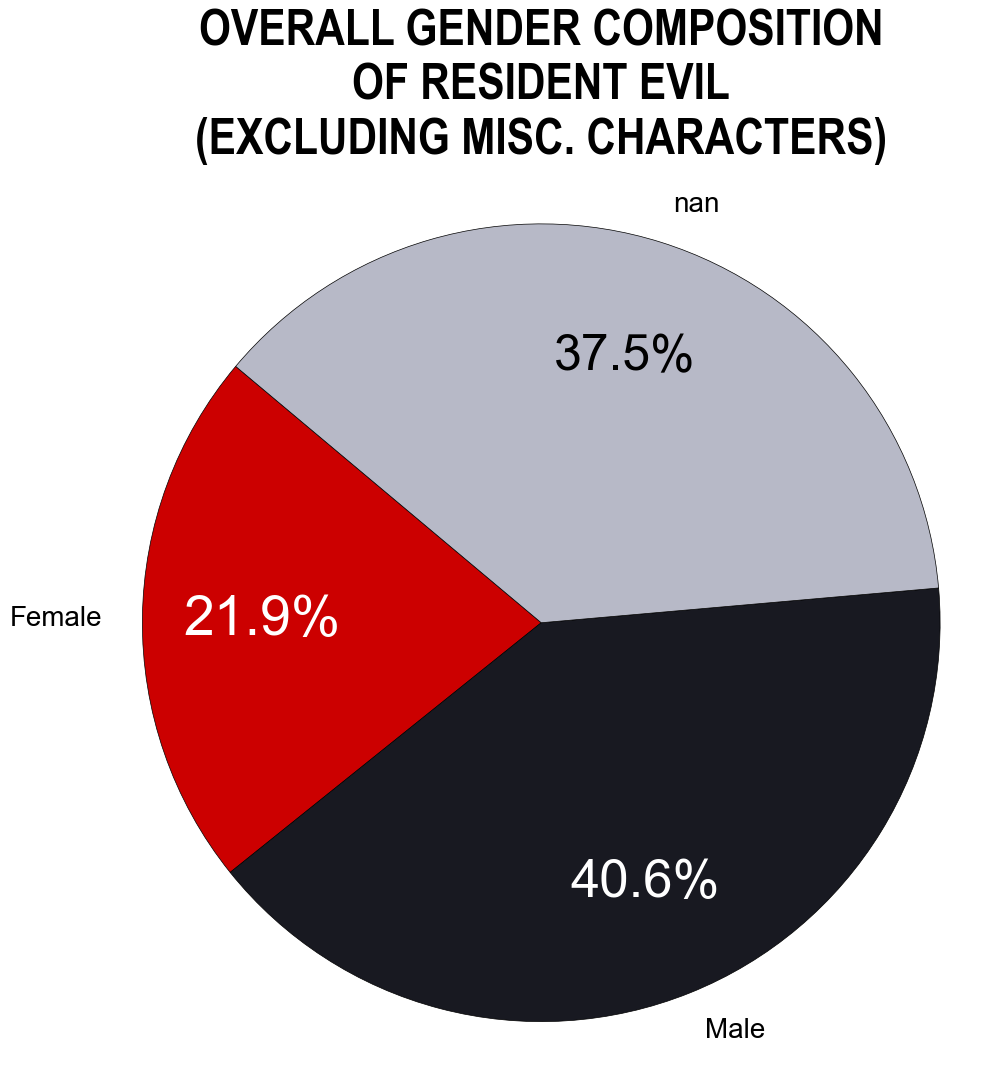

In [399]:
# An alternate way of viewing this data
# Count the number of times a gender appears in the dataset
# .groupby() will drop rows with `nan` values in 'Gender'
re_gender_counts_with_misc = re_data.groupby('Gender', dropna = False) \
                                ['Character'].nunique()
re_gender_counts_with_misc

# Create the visualization (pie chart)
fig, ax = plt.subplots(figsize=(10, 11))

def scale_annotations(autotexts: list) -> None:
    """Scales the annotations."""
    scale = 2.0 # Give the largest slice the largest annotation
    for autotext in autotexts:
        autotext.set_fontsize(label_style['fontsize'] * scale)
        if (scale > 0.5):
            scale -= 0.1

# Plot the data
wedges, texts, autotexts = ax.pie(re_gender_counts_with_misc, 
                                 labels = re_gender_counts_with_misc.index.
                                          get_level_values('Gender'),
                                 autopct = '%1.1f%%', 
                                 pctdistance = 0.70,
                                 radius = 0.80,
                                 colors = [female_color, 
                                           male_color, 
                                           undefined_color], 
                                 wedgeprops = {'ec': '#000000', 'lw': 0.5},
                                 startangle = 140)
ax.set_title('Overall Gender Composition\n' \
             'of Resident Evil\n' \
             '(Excluding misc. Characters)'.upper(),
             **title_style)

# Customize the annotations
for text in ax.texts:
    text.set_fontname(anno_style['fontname'])
    text.set_fontsize(label_style['fontsize'])

scale_annotations(autotexts)
autotexts[1].set_color('white')
autotexts[0].set_color('white')

plt.axis('equal')
plt.tight_layout()
plt.show()

## Why are there so many "nan" values within this dataset? Doesn't that suggest a problem with the original dataset?
Dialogue is not always spoken by named, gendered entities like "Claire" or "Chris." "Nan" characters include minor characters such as "HQ" and "Soldier" as well as digital entities, such as "Computer" and "Loudspeaker." It just so happens that there are a significant number of non-gendered entities within the *Resident Evil* series, resulting is us seeing so many "nan" values.

Of course, it is equally possible that we failed to correctly assign characters the proper gender labels -- we noted in `RE_Data_Setup.ipynb` that we only have a passing familiarity with the games. If a minor character happened to have a canon name and gender, we most likely weren't aware of it.

In the interest of clarity, let's see what happens when we temporarily remove these "nan"-gendered characters from our dataset.

In [326]:
# Count the number of times a gender appears in the dataset
# .groupby() will drop rows with `nan` values in 'Gender'
re_gender_counts_without_misc = re_data.groupby('Gender') \
                                ['Character'].nunique()
re_gender_counts_without_misc

Gender
Female    42
Male      78
Name: Character, dtype: int64

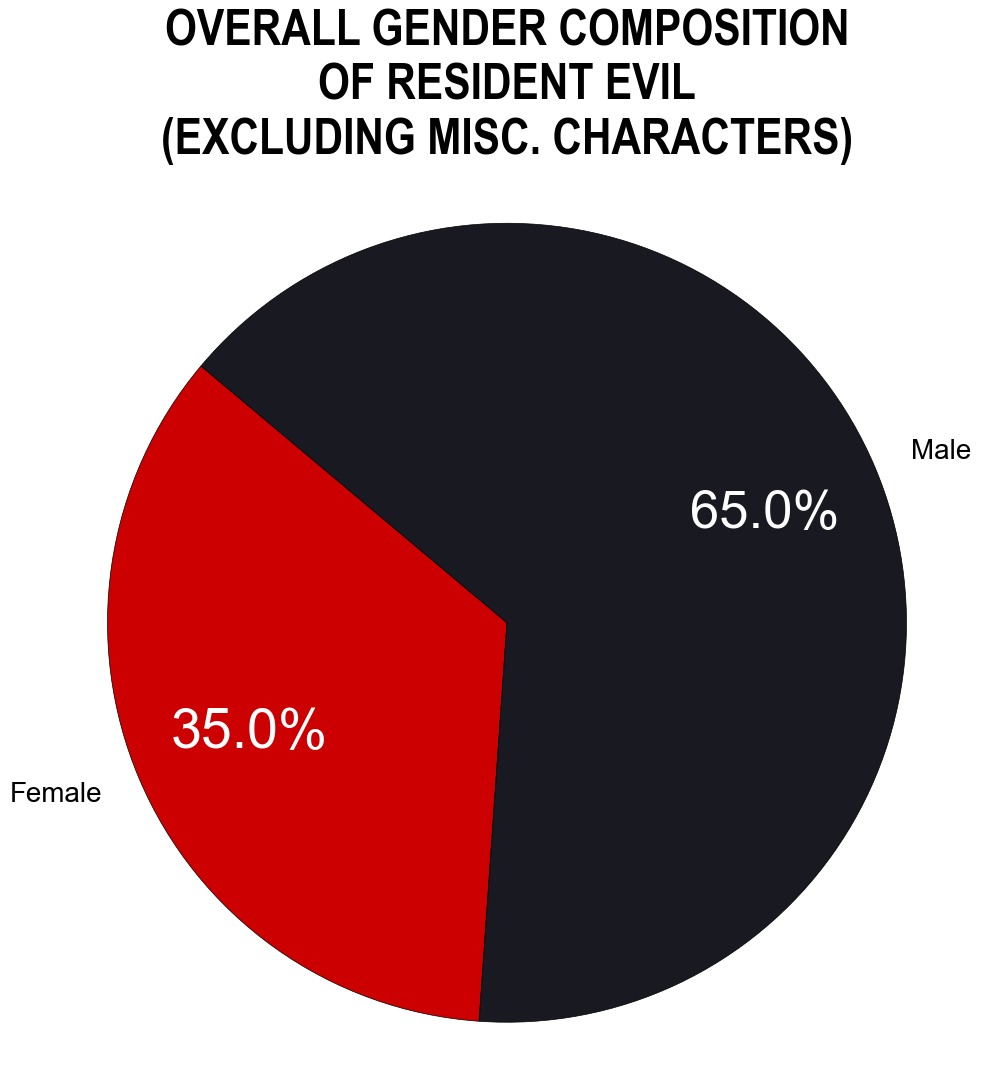

In [385]:
# Create the visualization (pie chart)
fig, ax = plt.subplots(figsize=(10, 11))

def scale_annotations(autotexts: list) -> None:
    """Scales the annotations."""
    scale = 2.0 # Give the largest slice the largest annotation
    for autotext in autotexts:
        autotext.set_fontsize(label_style['fontsize'] * scale)
        if (scale > 0.5):
            scale -= 0.1

# Plot the data
wedges, texts, autotexts = ax.pie(re_gender_counts_without_misc, 
                                 labels = re_gender_counts_without_misc.index.
                                          get_level_values('Gender'),
                                 autopct = '%1.1f%%', 
                                 pctdistance = 0.70,
                                 radius = 0.80,
                                 colors = [female_color, 
                                           male_color, 
                                           undefined_color], 
                                 wedgeprops = {'ec': '#000000', 'lw': 0.5},
                                 startangle = 140)
ax.set_title('Overall Gender Composition\n' \
             'of Resident Evil\n' \
             '(Excluding misc. Characters)'.upper(),
             **title_style)

# Customize the annotations
for text in ax.texts:
    text.set_fontname(anno_style['fontname'])
    text.set_fontsize(label_style['fontsize'])

scale_annotations(autotexts)
autotexts[1].set_color('white')
autotexts[0].set_color('white')

plt.axis('equal')
plt.tight_layout()
plt.show()

From looking at the bar chart and the pie chart, we can see that ***Resident Evil* is a male-dominated series.** With the possible exception of the cast of *Resident Evil Village*, the casts of the *Resident Evil* games all feature more male characters than female characters. Even when we focus on a subset of characters with "known" gender identities, we can see that 65% of those characters are male. These findings suggest that the gender composition of the *Resident Evil* series hasn't greatly changed from 1996 (the release year of the first *Resident Evil* game) to 2023 (the release year of the *Resident Evil 4* remake -- the most recently released game at the time of this analysis). The worlds of *Resident Evil* are predominantly male.

### But what about the protagonists? Should we assume that the *Resident Evil* series features more male characters than female characters?
We can answer this question by looking at the gender composition of the 14 playable characters within our dataset (Rebecca, Billy, Chris, Jill, Leon, Claire, Ada, Sherry, Steve, Sheva, Helena, Piers, Jake, and Ethan).

(We mentioned this earlier in the `RE_Data_Setup.ipynb` file, but we chose to only count a character as "playable" if the character was controllable from the start of the game. This results in our subset omitting mode-exclusive characters such as Wesker and DLC-exclusive characters such as Rose).

In [328]:
playable_characters = re_data[re_data['Playable'] == 'Playable']
playable_counts = playable_characters.groupby('Gender')['Character'].nunique()
playable_counts

Gender
Female    7
Male      7
Name: Character, dtype: int64

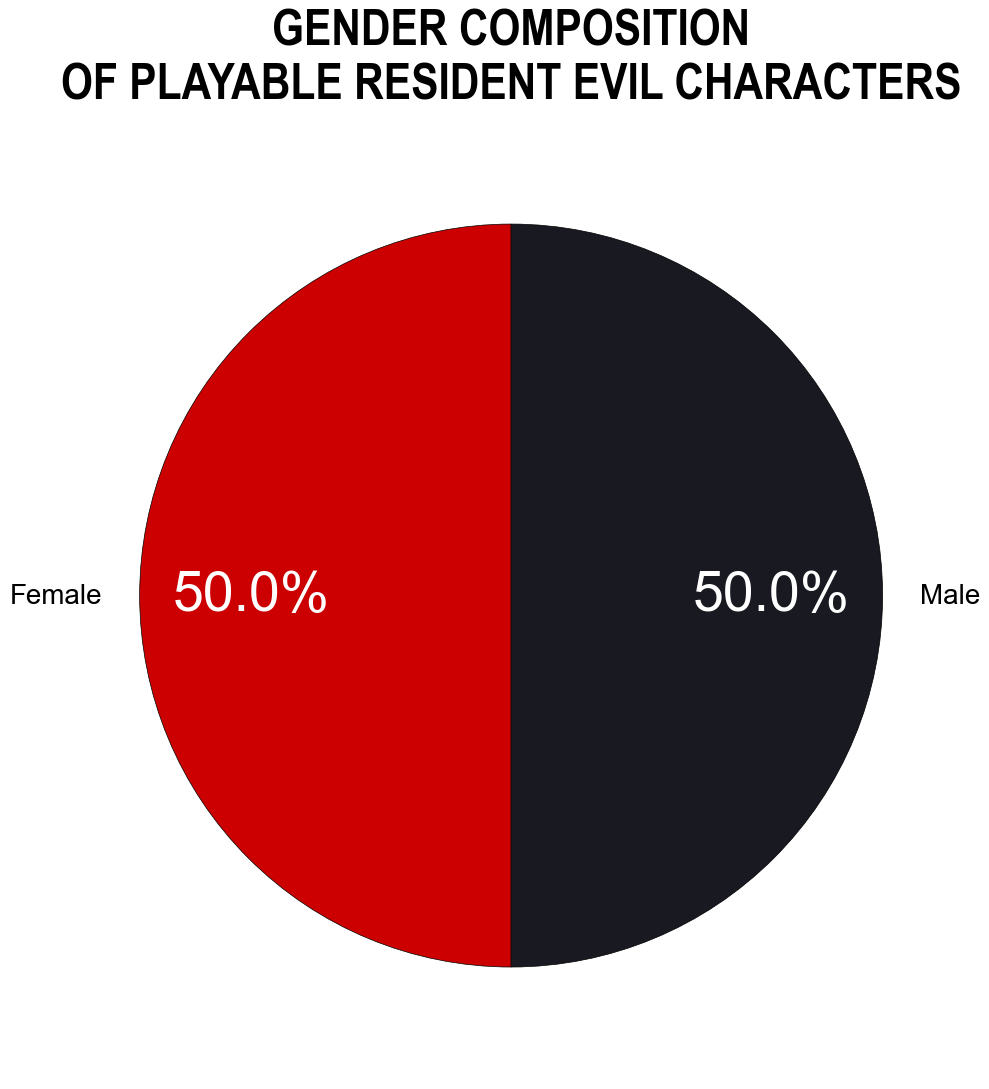

In [329]:
# Create the visualization (pie chart)
fig, ax = plt.subplots(figsize=(10, 11))

def scale_annotations(autotexts: list) -> None:
    """Scales the annotations."""
    scale = 0.5 # Give the largest slice the largest annotation
    for autotext in autotexts:
        autotext.set_fontsize(label_style['fontsize'] / scale)
        if (scale < 1.0):
            scale += 0.1

# Plot the data
wedges, texts, autotexts = ax.pie(playable_counts, 
                                 labels = playable_counts.index.
                                          get_level_values('Gender'),
                                 autopct = '%1.1f%%', 
                                 pctdistance = 0.70,
                                 radius = 0.80,
                                 colors = [female_color, 
                                           male_color], 
                                 wedgeprops = {'ec': '#000000', 'lw': 0.5},
                                 startangle = 90)
ax.set_title('Gender Composition\nof Playable Resident Evil Characters'.upper(), 
             **title_style)

# Customize the annotations
for text in ax.texts:
    text.set_fontname(anno_style['fontname'])
    text.set_fontsize(label_style['fontsize'])

# Since the percentages are equal, label scaling wouldn't make much sense here
autotexts[0].set_fontsize(label_style['fontsize'] * 2)
autotexts[1].set_fontsize(label_style['fontsize'] * 2) 
autotexts[0].set_color('white')
autotexts[1].set_color('white')

plt.axis('equal')
plt.tight_layout()
plt.show()

From this pie chart, we can see that despite the prevalence of male characters within the *Resident Evil* series, there is actually an equal percentage of male and female playable characters (based on our own definition of "playable"). This finding doesn't necessiarly suggest that the *Resident Evil* series is *not* biased -- it simply means that in terms of playable characters, the game doesn't prioritize one gender's experience over another gender's experience (i.e. you can only play as a male character and have to experience the game through a male lens).

It's important to note that not all of the *Resident Evil* games allow players to control characters of both genders for equal amounts of time. *Resident Evil 3: Nemesis*, for instance, primarily centers around Jill (a long-standing female protagonist), while *Resident Evil* pprimarily centers around Leon (a long-standing male protagonists). Jill is not playable in *Resident Evil 4*, and Leon is not playable in *Resident Evil 3: Nemesis*.

## **Question 2: How much do people talk in the Resident Evil games?**
For the next part of the analysis, we're going to look at the amount of dialouge within the series. We'll start by getting the total number of lines of dialogue within our dataset.

In [330]:
# Count the number of lines
re_dialogue_counts = re_data.groupby(['Game', 'Year'])['Line'].count()
re_dialogue_counts

Game                         Year
Resident Evil 0              2002     233
Resident Evil 1              1996     689
Resident Evil 2              1998     798
Resident Evil 2 Remake       2019     977
Resident Evil 3              1999     289
Resident Evil 3 Remake       2020     456
Resident Evil 4              2005     487
Resident Evil 4 Remake       2023    1092
Resident Evil 5              2009     694
Resident Evil 6              2012    1798
Resident Evil 7              2017     392
Resident Evil Code Veronica  2000     366
Resident Evil Village        2021     813
Name: Line, dtype: int64

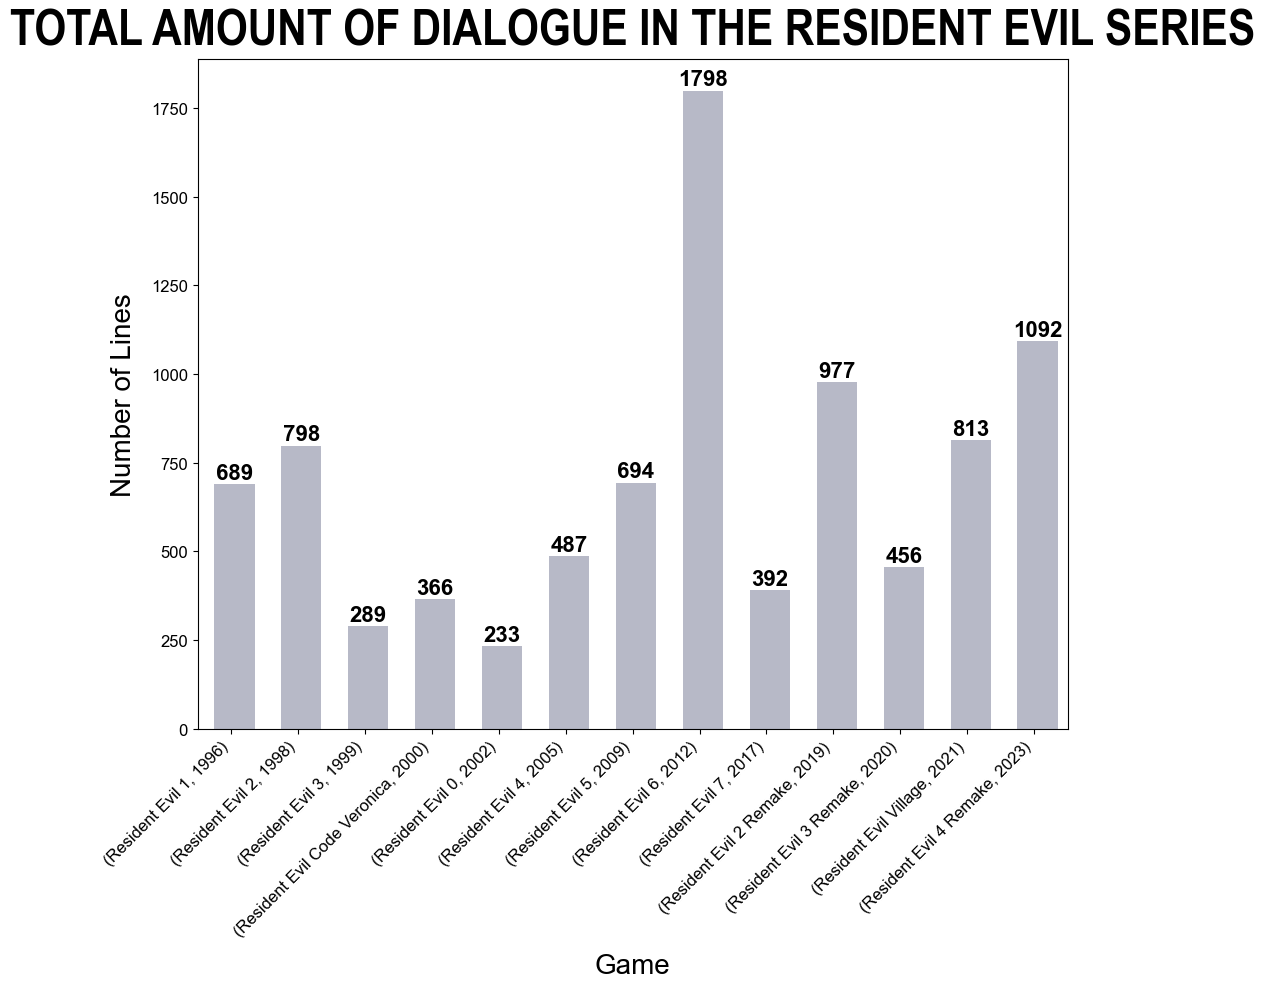

In [331]:
# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data
re_dialogue_counts = re_dialogue_counts.sort_index(level='Year')
ax = re_dialogue_counts.plot(kind = 'bar', color = [undefined_color])
# Annotate the data
for patch in ax.patches:
    patch.set_width(0.60)
    ax.annotate(f'{patch.get_height()}', 
                  (patch.get_x() + patch.get_width() / 2,
                   patch.get_height() + 15), 
                   ha = 'center', 
                   **anno_style)
ax.set_title('Total Amount of Dialogue in the Resident Evil Series'.upper(), **title_style)
ax.set_xlabel('Game', **label_style)
ax.set_ylabel('Number of Lines', **label_style)
plt.xticks(**tick_style, ha = 'right', rotation = 45)
plt.yticks(**tick_style)

plt.tight_layout()
plt.show()

Following our character gender composition analysis, let's also look at the number of lines attributed to male and female characters.

In [334]:
# Group lines by gender and count the number of lines assigned to each gender
re_dialogue_gender_counts = re_data.groupby(['Game', 'Year'])['Gender'] \
                                   .value_counts(dropna = False)
re_dialogue_gender_counts

Game                         Year  Gender
Resident Evil 0              2002  Male       124
                                   Female      93
                                   NaN         16
Resident Evil 1              1996  Male       391
                                   Female     292
                                   NaN          6
Resident Evil 2              1998  Female     431
                                   Male       306
                                   NaN         61
Resident Evil 2 Remake       2019  Female     505
                                   Male       378
                                   NaN         94
Resident Evil 3              1999  Male       150
                                   Female     114
                                   NaN         25
Resident Evil 3 Remake       2020  Male       246
                                   Female     188
                                   NaN         22
Resident Evil 4              2005  Male       356
        

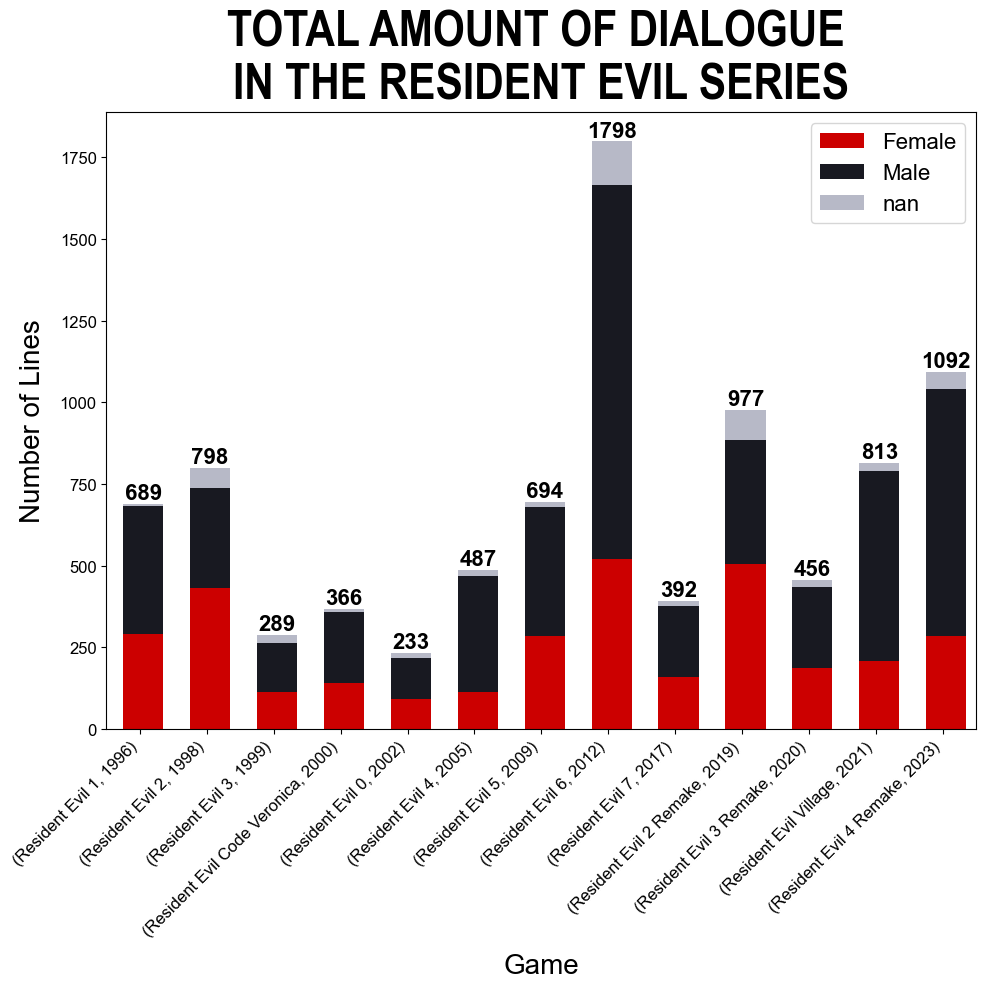

In [335]:
# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Total Dialogue in Resident Evil (by Gender)')
ax.set_xlabel('Game')
ax.set_ylabel('Number of Lines')

# Plot the data
gender_counts_pivot = re_dialogue_gender_counts.unstack(fill_value = 0)
gender_counts_pivot = gender_counts_pivot.sort_index(level = 'Year')
gender_counts_pivot.plot(kind = 'bar', stacked = True, 
                         color = [female_color, male_color, undefined_color], 
                         edgecolor = 'white', linewidth = 0, ax = ax)

# Annotate the data
for i, patch in enumerate(ax.patches):
    patch.set_width(0.60)
    if (i % len(gender_counts_pivot.columns) == 0):
        total_height = int(sum(p.get_height() for p in ax.patches 
                               if p.get_x() == patch.get_x()))
        ax.annotate(f'{total_height}', 
                      (patch.get_x() + patch.get_width() / 2,
                       total_height + 15),
                       ha = 'center',
                       **anno_style)
ax.set_title('Total Amount of Dialogue \nin the Resident Evil Series'.upper(), 
             **title_style)
ax.set_xlabel('Game', **label_style)
ax.set_ylabel('Number of Lines', **label_style)
ax.legend(prop = key_style)
plt.xticks(**tick_style, ha = 'right', rotation = 45)
plt.yticks(**tick_style)

plt.tight_layout()
plt.show()

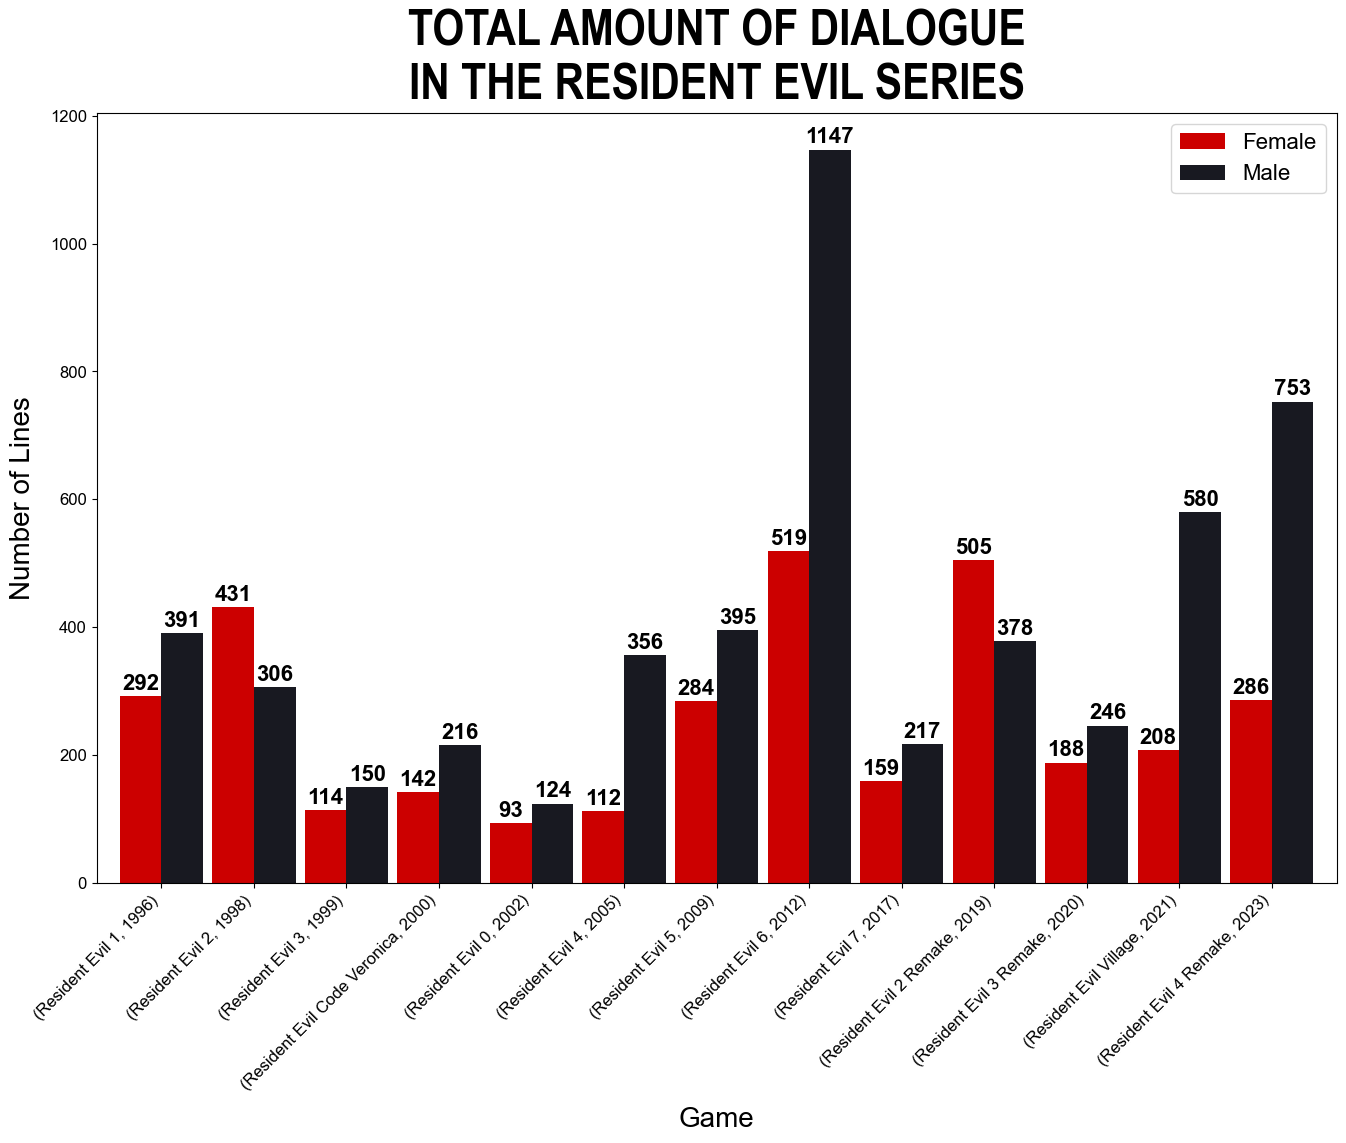

In [301]:
# An alternate way of viewing the data
re_gender_counts = re_data.groupby(['Game', 'Year'])['Gender'].value_counts()

# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(16, 10))

# Plot the data
gender_counts_pivot = re_gender_counts.unstack(fill_value = 0)
gender_counts_pivot = gender_counts_pivot.sort_index(level = 'Year')
gender_counts_pivot.plot(kind = 'bar', 
                         stacked = False, 
                         color = [female_color, male_color],
                         ax = ax,
                         width = 0.90)
# Annotate the data
for patch in ax.patches:
    ax.annotate(f'{patch.get_height()}',
                  (patch.get_x() + patch.get_width() / 2,
                   patch.get_height() + 10), 
                   ha = 'center',
                   **anno_style)

ax.set_title('Total Amount of Dialogue\nin the Resident Evil Series'.upper(),
              **title_style)
ax.set_xlabel('Game', **label_style)
ax.set_ylabel('Number of Lines', **label_style)
ax.legend(prop = key_style)
plt.xticks(**tick_style, ha = 'right', rotation = 45)
plt.yticks(**tick_style)

plt.show()

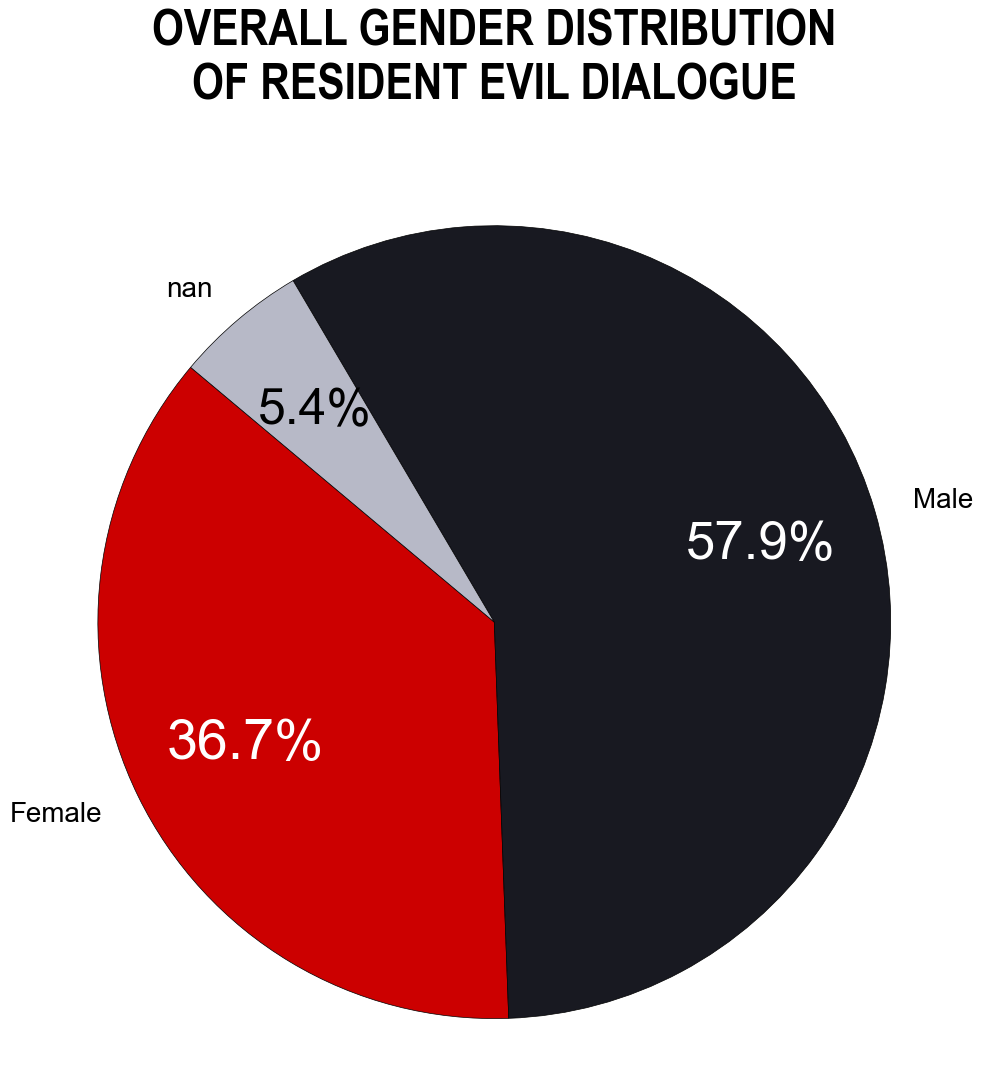

In [407]:
# A third way of viewing this data
# Group lines by gender and count the number of lines assigned to each gender
re_dialogue_gender_counts = re_data.groupby(['Gender'], dropna = False)['Line'] \
                                   .count()

# Create the visualization (pie chart)
fig, ax = plt.subplots(figsize=(10, 11))

def scale_annotations(autotexts: list) -> None:
    """Scales the annotations."""
    scale = 2.0 # Give the largest slice the largest annotation
    for autotext in autotexts:
        autotext.set_fontsize(label_style['fontsize'] * scale)
        if (scale > 0.5):
            scale -= 0.1

# Plot the data
wedges, texts, autotexts = ax.pie(re_dialogue_gender_counts, 
                                 labels = re_dialogue_gender_counts.index.
                                          get_level_values('Gender'),
                                 autopct = '%1.1f%%', 
                                 pctdistance = 0.70,
                                 radius = 0.80,
                                 colors = [female_color, 
                                           male_color, 
                                           undefined_color], 
                                 wedgeprops = {'ec': '#000000', 'lw': 0.5},
                                 startangle = 140)
ax.set_title('Overall Gender Distribution\n' \
             'of Resident Evil Dialogue\n'.upper(),
             **title_style)

# Customize the annotations
for text in ax.texts:
    text.set_fontname(anno_style['fontname'])
    text.set_fontsize(label_style['fontsize'])

scale_annotations(autotexts)
autotexts[1].set_color('white')
autotexts[0].set_color('white')

plt.axis('equal')
plt.tight_layout()
plt.show()

The charts suggest that male characters tend to speak more often than female characters. With the exception of the original *Resident Evil 2* and its remake, male characters generally have significantly more lines of dialogue than female characters. Nowhere is this difference more evident than in *Resident Evil 6*, where male characters collectively speak 1.21 times more than female characters.

But is this a case of quantity over quality? Knowing the number of lines of dialogue in the dataset only lets us understand how often characters of a certain gender identity speak; we don't receive any insight into the contents of the dialogue. For all we know, male characters could simply be prone to gasping more often than female characters and not engage in what we might consider "meaningful" dialogue.

While we can't easily examine dialogue contents without employing topic modelling (which is covered in other parts of this project), we can look at the number of words spoken within the dialogues. If female characters are making more substantial contributions to conversations, we should expect to see a correlation between higher dialogue word counts and female characters.

In [336]:
import re

def remove_stage_directions(line: str) -> str:
    """Removes stage directions from lines of dialogues.
    Stage directions are phrases contained within parentheses.
    """
    return re.sub("\(.*\)", '', line)

# Copy the data into a new dataframe
re_data_words = re_data.copy()
# Remove stage directions from the dataset
re_data_words['Line'] = re_data_words['Line'].apply(remove_stage_directions)
# Count the number of words in each character's dialogue
re_data_words['Words'] = re_data['Line'].apply(lambda x: len(x.split(' ')))
re_data_words

,Game,Year,Character,Gender,Playable,Line,Words
0,Resident Evil 0,2002,Narrator,NaN,Non-Playable,A small mid-western town in America: Raccoon C...,100
1,Resident Evil 0,2002,Man 1,Male,Non-Playable,Really?,1
2,Resident Evil 0,2002,Woman,Female,Non-Playable,"Hmm, do you think so too?",6
3,Resident Evil 0,2002,Man 2,Male,Non-Playable,Yeah.,1
4,Resident Evil 0,2002,Man 3,Male,Non-Playable,...do about it?,3
...,...,...,...,...,...,...,...
9079,Resident Evil Village,2021,Man,Male,Non-Playable,We have a clear shot.,5
9080,Resident Evil Village,2021,Man In Black,Male,Non-Playable,Stand down. I can handle it. She's just a kid.,10
9081,Resident Evil Village,2021,Rose,Female,Non-Playable,"Way to keep it together, Rose.",6
9082,Resident Evil Village,2021,Man In Black,Male,Non-Playable,"You're a lot like him, you know?",7


In [337]:
re_word_counts = round(re_data_words.groupby(
                       ['Game', 'Year', 'Gender'])['Words'].mean(), 2)
re_word_counts

Game                         Year  Gender
Resident Evil 0              2002  Female     6.55
                                   Male       9.48
Resident Evil 1              1996  Female     6.91
                                   Male      10.09
Resident Evil 2              1998  Female     9.16
                                   Male       8.91
Resident Evil 2 Remake       2019  Female     7.07
                                   Male       7.70
Resident Evil 3              1999  Female     7.65
                                   Male      12.39
Resident Evil 3 Remake       2020  Female     6.42
                                   Male      12.34
Resident Evil 4              2005  Female     6.64
                                   Male       9.53
Resident Evil 4 Remake       2023  Female     5.76
                                   Male       7.90
Resident Evil 5              2009  Female     7.81
                                   Male       8.61
Resident Evil 6              2012  Femal

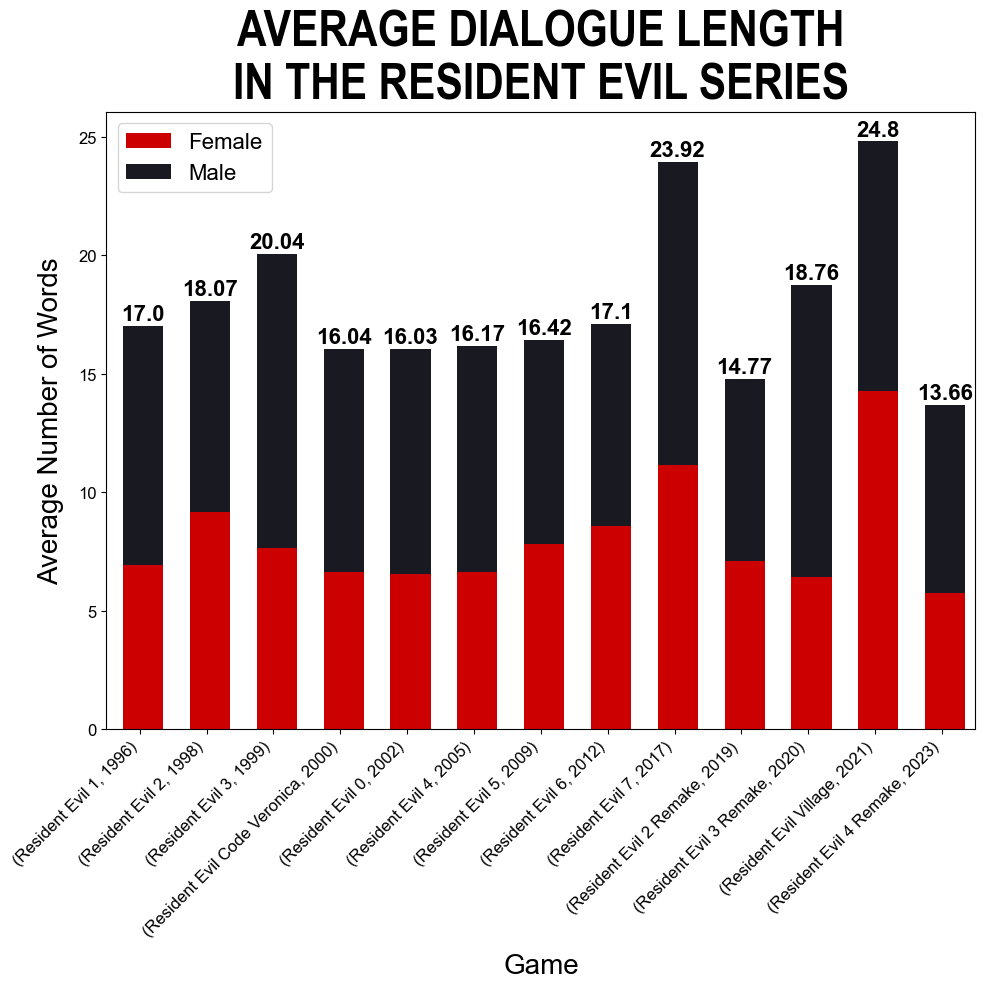

In [338]:
# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data
word_counts_pivot = re_word_counts.unstack(fill_value = 0)
word_counts_pivot = word_counts_pivot.sort_index(level = 'Year')
word_counts_pivot.plot(kind = 'bar', 
                       stacked = True, 
                       color = [female_color, male_color],
                       ax = ax)

# Annotate the data
for i, patch in enumerate(ax.patches):
    patch.set_width(0.60)
    if (i % len(word_counts_pivot.columns) == 0):
        total_height = round(sum(p.get_height() for p in ax.patches 
                             if p.get_x() == patch.get_x()), 2)
        ax.annotate(f'{total_height}', 
                    (patch.get_x() + patch.get_width() / 2,
                     total_height + 0.25),
                     ha = 'center',
                     **anno_style)
ax.set_title('Average Dialogue Length\nin the Resident Evil Series'.upper(),
             **title_style)
ax.set_xlabel('Game', **label_style)
ax.set_ylabel('Average Number of Words', **label_style)
ax.legend(prop = key_style)
plt.xticks(**tick_style, ha = 'right', rotation = 45)
plt.yticks(**tick_style)

plt.tight_layout()
plt.show()

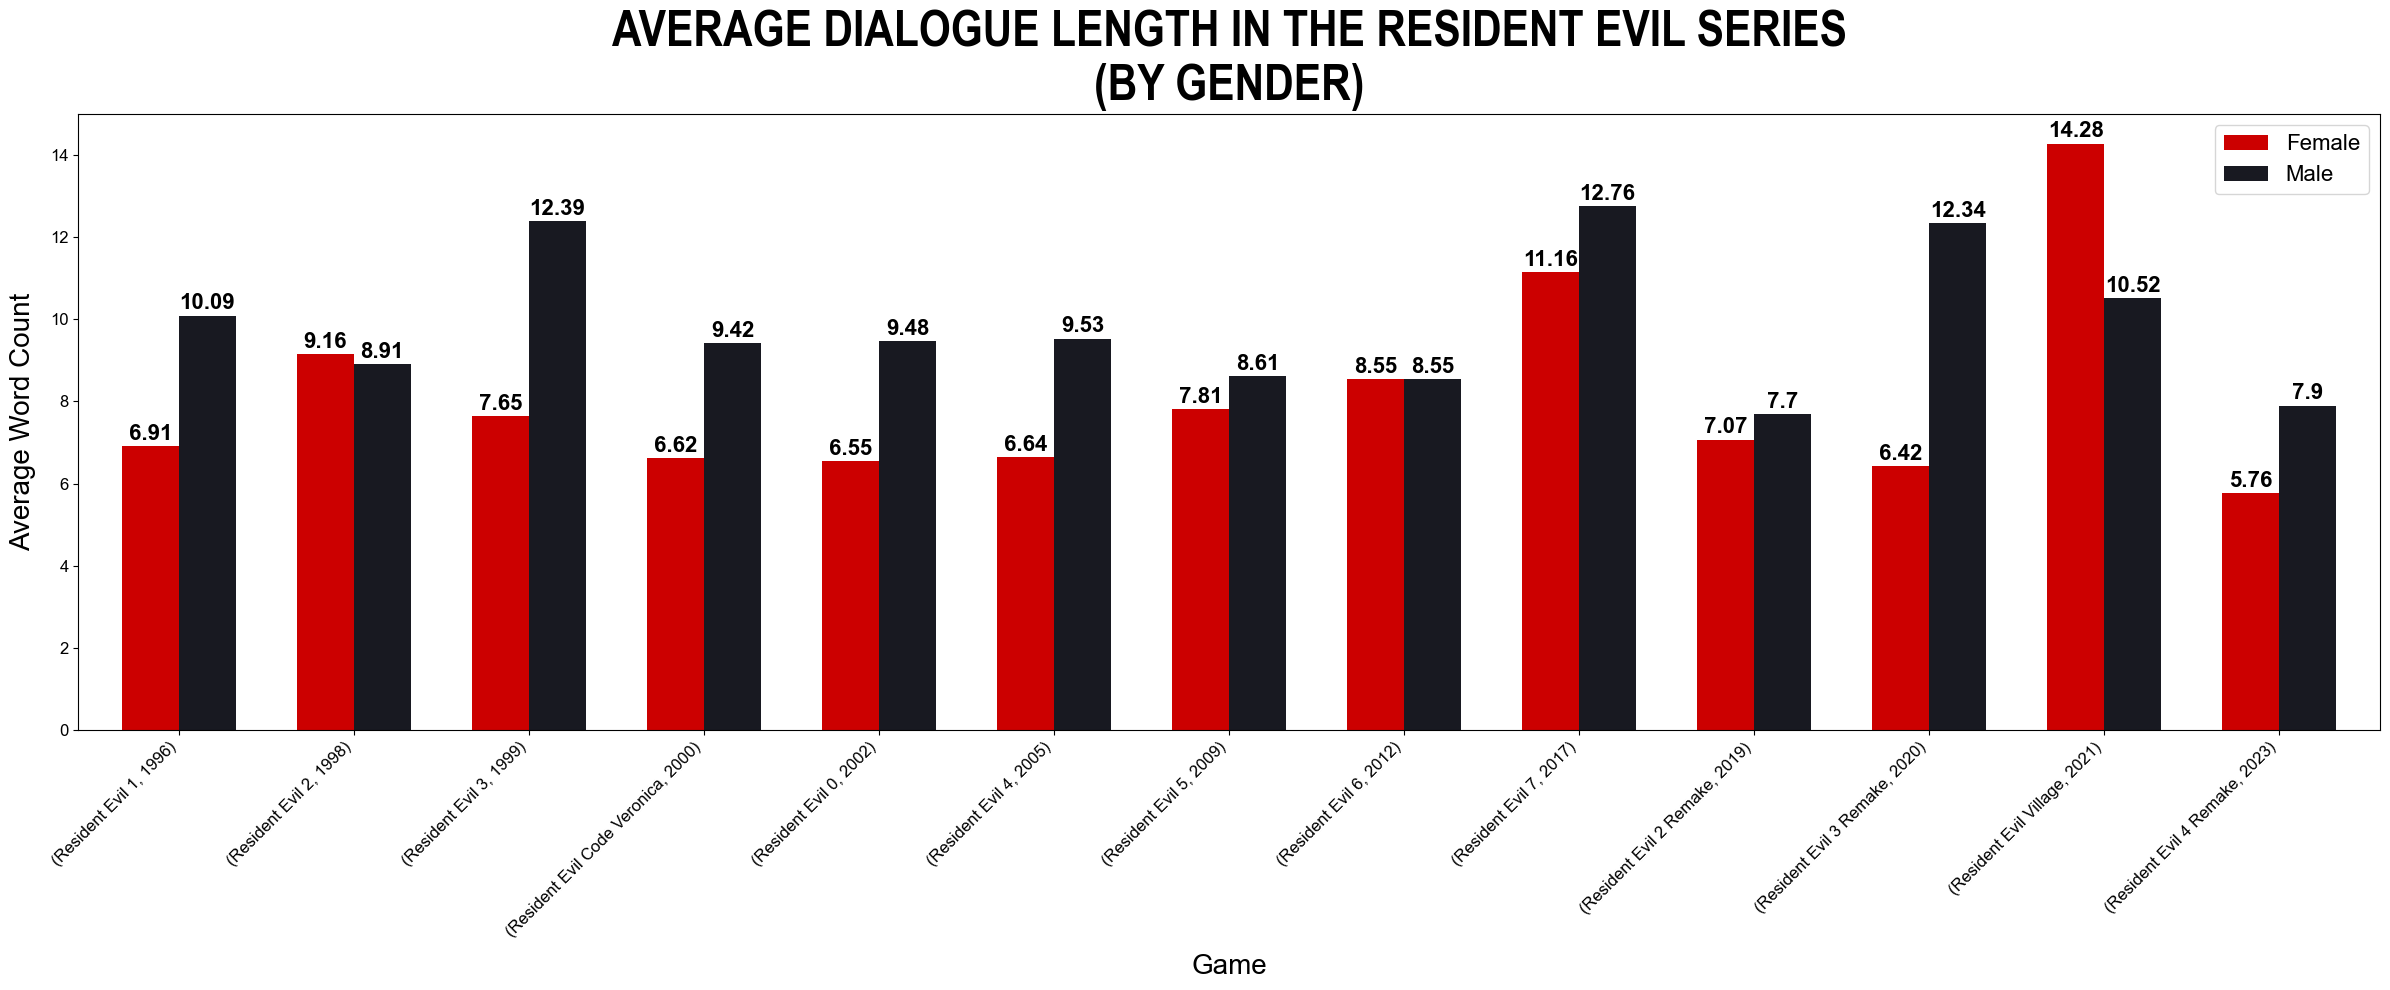

In [339]:
# An alternate way of viewing the data
# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(24, 10))

# Plot the data
word_counts_pivot = re_word_counts.unstack(fill_value = 0)
word_counts_pivot = word_counts_pivot.sort_index(level = 'Year')
word_counts_pivot.plot(kind = 'bar',
                       stacked = False, 
                       color = [female_color, male_color],
                       ax = ax,
                       width = 0.65)

# Annotate the data
for patch in ax.patches:
    ax.annotate(f'{patch.get_height()}',
                  (patch.get_x() + patch.get_width() / 2,
                   patch.get_height() + 0.15), 
                   ha = 'center',
                   **anno_style)
    
ax.set_title('Average Dialogue Length in the Resident Evil Series\n(by Gender)'.upper(),
             **title_style)
ax.set_xlabel('Game', **label_style)
ax.set_ylabel('Average Word Count', **label_style)
ax.legend(prop = key_style)
plt.xticks(**tick_style, ha = 'right', rotation = 45)
plt.yticks(**tick_style)

plt.tight_layout()
plt.show()

Here, we can see that male characters tend to have longer lines of dialogue than female characters, suggesting that the male characters contribute greater or equal numberes of words in conversations. With the exceptions of *Resident Evil 2* and *Resident Evil Village*, male characters have higher average dialogue word counts than female characters.

## **Question 3: Who speaks the most overall?**
Another aspect of this dataset we might want to look at is character dialogue count, seeing which characters have the greatest number of lines within the *Resident Evil* series. 

In [389]:
# Group the characters by name and gender
re_characters = re_data.groupby(['Character', 'Gender'], dropna = False)
# Count the number of times a character speaks
re_character_frequency_counts = re_characters['Line'].count()
# Sort the values
re_character_frequency_counts = re_character_frequency_counts \
                                .sort_values(ascending = False)
re_character_frequency_counts

Character        Gender
Leon             Male      1480
Chris            Male       827
Claire           Female     634
Jill             Female     509
Ethan            Male       437
                           ... 
Unknown Speaker  NaN          1
Woman In Black   Female       1
Woman 1          Female       1
Witness          NaN          1
Young Girl       Female       1
Name: Line, Length: 192, dtype: int64

For better readability, let's limit our focus to the top 10 characters.

In [396]:
# Get the characters with the most amount of dialogue
re_character_frequency_counts = re_character_frequency_counts[:10]
re_character_frequency_counts

Character  Gender
Leon       Male      1480
Chris      Male       827
Claire     Female     634
Jill       Female     509
Ethan      Male       437
Sherry     Female     406
Ada        Female     283
Ashley     Female     281
Jake       Male       269
Piers      Male       247
Name: Line, dtype: int64

## Why does this subset only show 192 characters? Didn't we see 276 characters in the first bar chart?
Characters can appear in multiple *Resident Evil* games. Chris, for instance, makes a cameo in seven of our thirteen games. In the first bar chart, we were counting the number of characters that appeared in each game. For each time Chris appeared in a *Resident Evil* game, we counted Chris as a separate character (meaning that was he was counted seven times -- once for each game). If you try to find the total number of characters by summing the total number of characters featured per game, you end up counting those duplicate instances, resulting in an inaccurate total character count.

In this specific analysis, we're only counting the number of dialogue lines attributed to each character, which leads to us "counting" a  character found within our dataset as a single instance of the character. As a result, the total number of characters is lower (and correct).

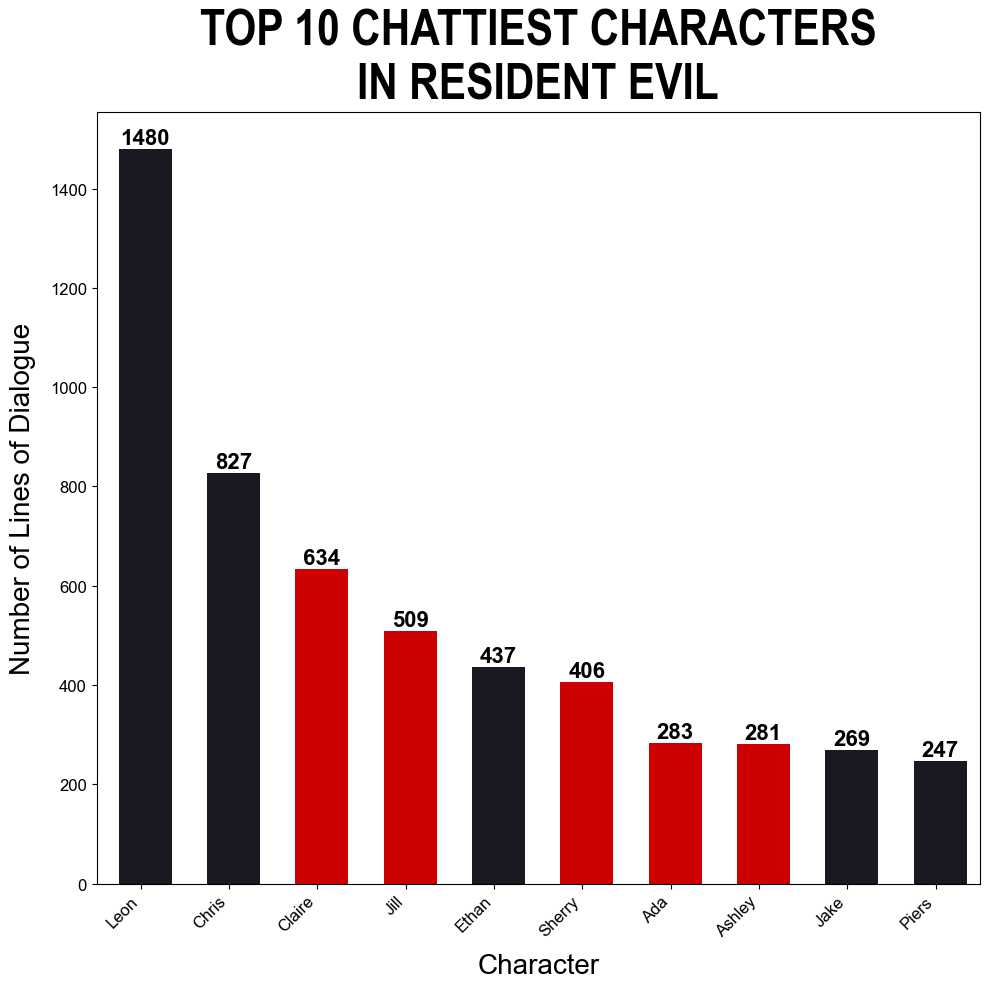

In [398]:
# Define the chart colors
chart_colors = []
for index, (character, gender) in enumerate(re_character_frequency_counts.keys()):
    if (gender.lower()== 'male'):
        chart_colors.append(male_color)
    elif (gender.lower() == 'female'):
        chart_colors.append(female_color)
    else:
        chart_colors.append(undefined_color)

# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(10, 10))

ax = re_character_frequency_counts.plot(kind = 'bar', color = chart_colors)

# Annotate the data
for index, patch in enumerate(ax.patches):
    patch.set_width(0.60)
    ax.annotate(f'{patch.get_height()}', (patch.get_x() + patch.get_width() / 2,
                                          patch.get_height() + 10),
                                          ha = 'center', **anno_style)

ax.set_title('Top 10 Chattiest Characters\n' \
             'in Resident Evil'.upper(), 
             **title_style)
ax.set_xlabel('Character', **label_style)
ax.set_xticklabels(re_character_frequency_counts.reset_index()['Character'])
ax.set_ylabel('Number of Lines of Dialogue', **label_style)
plt.xticks(**tick_style, ha = 'right', rotation = 45)
plt.yticks(**tick_style)

plt.tight_layout()
plt.show()


The results are not too surprising. With the exception of Ashley, who is only controllable for certain segments of *Resident Evil 4* and its remake, all the characters featured on this bar chart (Leon, Chris, Claire, Jill, Ethan, Sherry, Ada, Jake, and Piers) are playable characters in the *Resident Evil* series. These playable characters are more likely to have more dialogue than other types of characters due to these playable characters having more central roles in the plot and gameplay.

While an equal number of male and female characters are represented in the bar chart -- with five male characters and five female characters being featured in the figure -- the male characters collectively speak 1147 more lines than the female characters. Additionally, female characters who appear in the same games as other male characters notably do not receive as much dialogue as the male characters. Ada appears in the same games as Leon (*Resident Evil 2*, *Resident Evil 4*, *Resident Evil 6*, the *Resident Evil 2* remake, and the *Resident Evil 4* remake) but has significantly less dialogue than Leon in the overall series.